BENEDETTO, Luca  | IBARRONDO, Alberto

# INTRODUCTION


In this session, your will implement, train and test a Neural Network
for the Handwritten Digits Recognition problem <a href="http://yann.lecun.com/exdb/mnist/"> [1] </a> with  different settings of hyper parameters. You will use the MNIST dataset which was constructed from a number of scanned document dataset available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. 


<img src="mnistExamples.png",width="350" height="500" align="center">
<center><span></span></center>

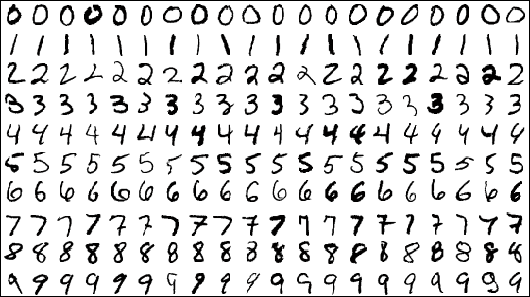

In [5]:
# FIGURE 1: MNIST digits examples

This assignment includes a written part of programms to help you understand how to build and train
your neural net and then to test your code and get restults. 

1. <a href="NNet.py"> NeuralNetwork.py </a> 
2. <a href="transfer_functions.py"> transfer_functions.py </a> 
3. <a href="utils.py "> utils.py </a> 

We use the following libraries:

1. <a href="http://cs231n.github.io/python-numpy-tutorial/"> numpy </a>: for creating arrays and using methods to manipulate arrays.

2. <a href="http://matplotlib.org/"> matplotlib  </a>: for making plots
 


# A PRIMITIVE NEURAL NETWORK

## Manual design of a Neural Network

Before designing and writing your code, you will first work on a neural network by hand. 
Consider the above Neural network with two inputs $X=(x1,x2)$, one hidden layers and a single output unit $(y)$.
The initial weights are set to random values. Neurons 6 and 7 represent the bias. Bias values are equal to 1.  
Training sample, X = (0.8, 0.2), whose class label is Y=0.4.

Assume that the neurons have a Sigmoid activation function  $f(x)=\frac{1}{(1+e^{-x})}$ and the learning rate $\mu$=1

### <b><i>Question 1.1.1</i></b>

Compute the new values of weights $w_{i,j}$ after a forward pass and a backward pass.
$w_{i,j}$ is the weight of the connexion between neuron $i$ and neuron $j$.

In [6]:
import numpy as np
import matplotlib as plt
import NNet as nn
import transfer_functions as tf

In [7]:
# Calculating manually all the values
# Initial values
x = [0.8, 0.2]
w1 = [[0.3, -0.5], [0.8, 0.2], [0.2, -0.4]]
w2 = [-0.6, 0.4, 0.5]
y = 0.4
u = 1

#Feedforward computation
inpt = np.append(x, 1.0)

u1 = np.dot(inpt, w1)
o1 = np.append(tf.sigmoid(u1), 1.0)

u2 = np.dot(o1, w2)
o2 = tf.sigmoid(u2)


#Backward computation
E = (1.0/2.0)*((y-o2)**2.0)

dEdu2 = (y-o2)*tf.dsigmoid(o2)
dEdu1 = np.dot(w2, dEdu2)*tf.dsigmoid(o1)

w2 += u*o1.T.dot(dEdu2)
w1 += u*np.outer(inpt, dEdu1[:-1])

print('u1 : ', u1)
print('o1: ', o1)
print('u2 : ', u2)
print('o2: ', o2)
print('w2 : ', w2)
print('w1: ', w1)

u1 :  [ 0.6  -0.76]
o1:  [ 0.64565631  0.31864627  1.        ]
u2 :  0.240064722749
o2:  0.55972959911
w2 :  [-0.62541468  0.38745727  0.46063746]
w1:  [[ 0.30432265 -0.50273473]
 [ 0.80108066  0.19931632]
 [ 0.20540332 -0.40341841]]


VALUES COMPUTED:

$w_{1,3}=0.30345983$ 

$w_{1,4}=-0.50218887$

$w_{2,3}=0.80108066$

$w_{2,4}=0.19931632$

$w_{6,3}=0.20540332$

$w_{6,4}=-0.40341841$

$w_{3,5}=-0.62541468$

$w_{4,5}=0.38745727$

$w_{7,5}=0.46063746$




---
## Basic Neural Network Implementation on Python

### <b>Question 1.2.1</b>

Define the neural network corresponding to the one in part 2.1

In [8]:
#create the network
my_nnet = nn.NNet(n_input=2,netDims=[2,1],learn=1)

In [9]:
#Data preparation
X=[0.8,0.2]
Y=[0.4]

#initialize weights
wi=np.array([[0.3,-0.5],[0.8,0.2],[0.2,-0.4]])
wo=np.array([[-0.6],[0.4],[0.5]])

my_nnet.init_w([wi,wo])
print(my_nnet.W)

[array([[ 0.3, -0.5],
       [ 0.8,  0.2],
       [ 0.2, -0.4]]), array([[-0.6],
       [ 0.4],
       [ 0.5]])]


---
### <b>Question 1.2.2</b>

Implement the Feed Forward function (feedForward(X) in the NeuralNetwork.py file)



In [10]:
def feedForward(selfa, inputs):
    # Set input with untouched bias. 1st activation
    selfa.input[0:selfa.n_input-1] = inputs
    selfa.values[0] = selfa.tf(np.append(
        np.dot(selfa.input,
               selfa.W[0]),
        1.0))
    
    #Hidden activations
    for layer in range(1, selfa.n_layers-1):
        selfa.values[layer] = selfa.tf(np.append
            (np.dot(selfa.values[layer-1],
                    selfa.W[layer]),
             1.0))

    #Output activation (no bias)
    selfa.values[-1] = selfa.tf(
        np.dot(selfa.values[-2], selfa.W[-1]))
    selfa.output = selfa.values[-1]
    
    return selfa.values[-1]

Check that our network outputs the expected value (the one you computed in question 1.1)

In [11]:
# test my  Feed Forward function 
Output_activation=my_nnet.feedForward(X)
print("output activation =%.3f" %(Output_activation))

output activation =0.560


---
### <b>Question 1.2.3</b>

Implement the Back-propagation Algorithm (backPropagate(Y) in the NeuralNetwork.py file)  


In [12]:
def backPropagate(selfa, targets):
    selfa.dEdU[-1] =   (selfa.output-targets) * \
                        selfa.dtf(selfa.output)
    selfa.dEdU[-2] = np.multiply(
                np.dot(selfa.W[-1], selfa.dEdU[-1]),
                selfa.dtf(selfa.values[-2]))
    # calculate error terms for hidden layers
    for layer in range(selfa.n_layers-2, 0, -1):
        selfa.dEdU[layer-1] = np.multiply(
            np.dot(selfa.W[layer],
                   selfa.dEdU[layer][:-1]),
            selfa.dtf(selfa.values[layer-1]))

    # update network weights
    selfa.W[-1] -= selfa.learn * \
                   np.outer(selfa.values[-2],
                            selfa.dEdU[-1])

    for layer in range(1, selfa.n_layers-1):
        selfa.W[layer] -= selfa.learn * \
                          np.outer(selfa.values[layer-1],
                                   selfa.dEdU[layer][:-1])
    selfa.W[0] -= selfa.learn * \
                  np.outer(selfa.input,
                           selfa.dEdU[0][:-1])

    # calculate error
    E = (1.0/2.0)*((targets-selfa.output)**2.0)

Checking that the gradient values and weight updates are correct (similar to the ones you computed in question 1.1)

In [13]:
#test Back-propagation function
wi=np.array([[0.3,-0.5],[0.8,0.2],[0.2,-0.4]])
wo=np.array([[-0.6],[0.4],[0.5]])
my_nnet.init_w([wi,wo])
Output_activation=my_nnet.feedForward(X)
my_nnet.backPropagate(Y)

#Print weights after backpropagation and comparing
print(w2)
print(my_nnet.W[-1].T)
print(my_nnet.W[-1].T==w2)
print(w1)
print(my_nnet.W[0])
print(my_nnet.W[0]==w1)

[-0.62541468  0.38745727  0.46063746]
[[-0.62541468  0.38745727  0.46063746]]
[[ True  True  True]]
[[ 0.30432265 -0.50273473]
 [ 0.80108066  0.19931632]
 [ 0.20540332 -0.40341841]]
[[ 0.30432265 -0.50273473]
 [ 0.80108066  0.19931632]
 [ 0.20540332 -0.40341841]]
[[ True  True]
 [ True  True]
 [ True  True]]



Our Feed Forward and Back-Propagation implementations are working, Great!! Let's tackle a real world problem.



# THE MNIST CHALLENGE

## <b>Data Preparation</b>

The MNIST dataset consists of handwritten digit images it contains 60,000 examples for the training set and 10,000 examples for testing. In this Lab Session, the official training set of 60,000 is divided into an actual training set of 50,000 examples, 10,000 validation examples and 10,000 examples for test. All digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. The images are stored in byte form you will use the NumPy python library to read the data files into NumPy arrays that we will use to train the ANN.

The MNIST dataset is available in the Data folder.
To get the training, testing and validation data, run the the load_data() function.


In [19]:
from utils import *
import gzip

np.random.seed(1990)

with gzip.open('mnist.pkl.gz', 'r') as f:
        train_set, valid_set, test_set = \
                pickle.load(f, encoding='latin1')
f.close()

training_data = [(train_set[0][i], 
                  [1 if j == train_set[1][i]\
                   else 0 for j in range(10)]) \
            for i in np.arange(len(train_set[0]))]

test_data =     [(test_set[0][i],
                  [1 if j == test_set[1][i]\
                   else 0 for j in range(10)]) \
            for i in np.arange(len(test_set[0]))]
validation_data = [(valid_set[0][i],
                  [1 if j == valid_set[1][i] \
                   else 0 for j in range(10)]) \
            for i in np.arange(len(valid_set[0]))]

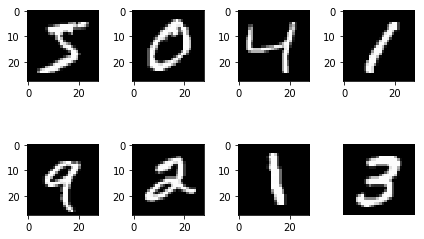

In [20]:
# MNIST Dataset Digits Visualisation
ROW = 2
COLUMN = 4
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = training_data[i][0].reshape(28, 28)   
    plt.subplot(ROW, COLUMN, i+1)          
    plt.imshow(image, cmap='gray')
plt.axis('off') 
plt.tight_layout()   # padding between subplots
plt.show()



---

## NNet Implementation

The input layer of the neural network contains neurons encoding the values of the input pixels. The training data for the network will consist of many 28 by 28 pixel images of scanned handwritten digits, and so the input layer contains 784=28×28 neurons. The second layer of the network is a hidden layer, we set the neuron number in the hidden layer to 30. The output layer contains 10 neurons. 

### <b>Question 2.1.1</b>

Create the network described above using the NeuralNetwork class

In [21]:
#create the network
my_mnist_net = nn.NNet(n_input=784,
                       netDims=[30,10],
                       n_iter=50,
                       learn=0.1)

---
### <b>Question 2.1.2</b>

Add the information about the performance of the neural network on the test set at each epoch

In [22]:
test_accuracy=my_mnist_net.predict(test_data)/100
print('Test_Accuracy  %-2.2f' % test_accuracy)

Test_Accuracy  9.28


---
### <b>Question 2.1.3</b>

Train the Neural Network and comment your findings

iter:  1/50 --> E: 0.1147973388  -Training_Accuracy:  92.79  -t: 8.11 
iter:  2/50 --> E: 0.0553362555  -Training_Accuracy:  94.49  -t: 16.36 
iter:  3/50 --> E: 0.0456861361  -Training_Accuracy:  95.53  -t: 24.68 
iter:  4/50 --> E: 0.0408844618  -Training_Accuracy:  95.75  -t: 32.74 
iter:  5/50 --> E: 0.0374169214  -Training_Accuracy:  96.30  -t: 40.90 
iter:  6/50 --> E: 0.0347601436  -Training_Accuracy:  96.32  -t: 49.35 
iter:  7/50 --> E: 0.0329985071  -Training_Accuracy:  96.52  -t: 57.44 
iter:  8/50 --> E: 0.0312234614  -Training_Accuracy:  96.80  -t: 65.46 
iter:  9/50 --> E: 0.0298837979  -Training_Accuracy:  97.05  -t: 74.14 
iter: 10/50 --> E: 0.0288048911  -Training_Accuracy:  97.16  -t: 82.32 
iter: 11/50 --> E: 0.0275502516  -Training_Accuracy:  97.24  -t: 90.53 
iter: 12/50 --> E: 0.0266483035  -Training_Accuracy:  97.39  -t: 98.70 
iter: 13/50 --> E: 0.0258145082  -Training_Accuracy:  97.50  -t: 107.06 
iter: 14/50 --> E: 0.0248970720  -Training_Accuracy:  97.61  -t:

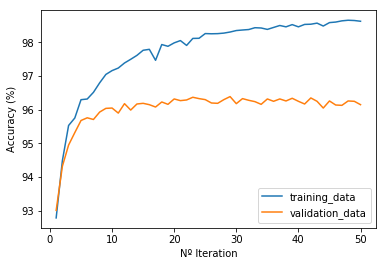

In [23]:
#train your network 
Tr_acc1, Val_acc1 = my_mnist_net.train(training_data,
                                       validation_data,
                                       True, True, True)
my_mnist_net.save('mnist_nD30-10_it20_l01.model')

<div class='alert alert-success'>
<b>COMMENT:</b><br/>

After iteration nº 10 there is almost no improvement in the accuracy on the validation test.
</div>

---
### <b>Question 2.1.4</b>

Guess digit, Implement and test a python function that predict the class of a digit (the folder images_test contains some examples of images of digits)


In [13]:
#Your implementation goes here
def guess(nnet_obj, digit_img):
    digit_class = my_mnist_net.feedForward(digit_img)
    return np.argmax(digit_class)
    
    
digit_image = test_data[0][0]
digit_val = guess(my_mnist_net, digit_img=digit_image)
print(digit_val)

7


---

## NNet Optimization

Change the neural network structure and parameters to optimize performance

### <b> Question 2.2.1</b>

Change the learning rate (0.001, 0.1, 1.0 , 10). Train the new neural nets with the original specifications (Part 2.1), for 50 iterations. 
Plot test accuracy vs iteration for each learning rate on the same graph. Report the maximum
test accuracy achieved for each learning rate. Which one achieves the maximum test accuracy?

In [25]:
# Implementation with a learning rate of 0.001 
my_mnist_net2 = nn.NNet(n_input=784,
                        netDims=[30,10],
                        n_iter=50,
                        learn=0.001)

iter:  1/50 --> E: 0.5750299447  -Training_Accuracy:  29.38  -t: 8.69 
iter:  2/50 --> E: 0.4163030463  -Training_Accuracy:  37.31  -t: 17.25 
iter:  3/50 --> E: 0.3739675123  -Training_Accuracy:  52.12  -t: 25.61 
iter:  4/50 --> E: 0.3310268428  -Training_Accuracy:  63.39  -t: 34.01 
iter:  5/50 --> E: 0.2919505869  -Training_Accuracy:  70.87  -t: 42.37 
iter:  6/50 --> E: 0.2574201758  -Training_Accuracy:  75.28  -t: 50.59 
iter:  7/50 --> E: 0.2282355101  -Training_Accuracy:  78.30  -t: 59.02 
iter:  8/50 --> E: 0.2046967249  -Training_Accuracy:  80.86  -t: 67.44 
iter:  9/50 --> E: 0.1862060003  -Training_Accuracy:  82.57  -t: 75.84 
iter: 10/50 --> E: 0.1714471452  -Training_Accuracy:  84.03  -t: 84.30 
iter: 11/50 --> E: 0.1593253771  -Training_Accuracy:  85.09  -t: 92.69 
iter: 12/50 --> E: 0.1492450400  -Training_Accuracy:  85.91  -t: 101.25 
iter: 13/50 --> E: 0.1407860433  -Training_Accuracy:  86.48  -t: 109.67 
iter: 14/50 --> E: 0.1336292585  -Training_Accuracy:  87.11  -t

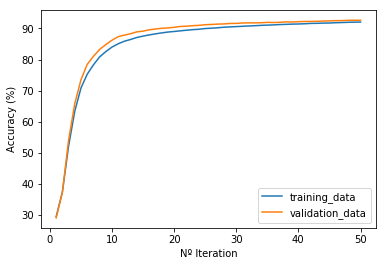

In [14]:
Tr_acc2, Val_acc2 = my_mnist_net2.train(training_data,
                                        validation_data,
                                        True, True, True)
my_mnist_net2.save("mnist_nD30-10_it50_l0001.model")

In [26]:
# Implementation with a learning rate of 1.0 
my_mnist_net4 = nn.NNet(n_input=784,
                        netDims=[30,10],
                        n_iter=50,
                        learn=1)

iter:  1/50 --> E: 0.0869943052  -Training_Accuracy:  92.77  -t: 8.52 
iter:  2/50 --> E: 0.0616437472  -Training_Accuracy:  93.23  -t: 16.69 
iter:  3/50 --> E: 0.0566070897  -Training_Accuracy:  93.92  -t: 25.10 
iter:  4/50 --> E: 0.0529684859  -Training_Accuracy:  94.44  -t: 33.57 
iter:  5/50 --> E: 0.0495543964  -Training_Accuracy:  94.10  -t: 42.33 
iter:  6/50 --> E: 0.0486023943  -Training_Accuracy:  94.33  -t: 50.75 
iter:  7/50 --> E: 0.0476317300  -Training_Accuracy:  94.74  -t: 59.28 
iter:  8/50 --> E: 0.0464348046  -Training_Accuracy:  95.20  -t: 68.18 
iter:  9/50 --> E: 0.0448266871  -Training_Accuracy:  95.05  -t: 76.87 
iter: 10/50 --> E: 0.0444483969  -Training_Accuracy:  95.61  -t: 85.31 
iter: 11/50 --> E: 0.0423387844  -Training_Accuracy:  95.33  -t: 93.63 
iter: 12/50 --> E: 0.0414947883  -Training_Accuracy:  94.91  -t: 102.18 
iter: 13/50 --> E: 0.0409368524  -Training_Accuracy:  95.43  -t: 110.68 
iter: 14/50 --> E: 0.0406828149  -Training_Accuracy:  95.65  -t

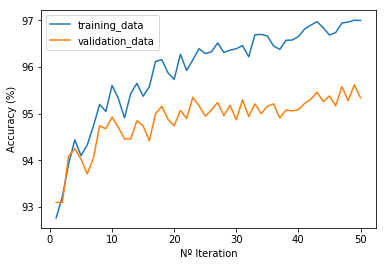

In [15]:
Tr_acc4, Val_acc4 = my_mnist_net4.train(training_data,
                                        validation_data,
                                        True, True, True)
my_mnist_net4.save("mnist_nD30-10_it50_l1.model")

In [27]:
# Implementation with a learning rate of 10
my_mnist_net5 = nn.NNet(n_input=784,
                        netDims=[30,10],
                        n_iter=50,
                        learn=10)

C:\Users\AlbertoIbarrondo\Documents\DeepLearning\AlbertoTopVersion\transfer_functions.py:2: RuntimeWarning: overflow encountered in exp
  def sigmoid(x):  return 1 / (1 + np.exp(-x))


iter:  1/50 --> E: 0.5277766907  -Training_Accuracy:  12.04  -t: 8.45 
iter:  2/50 --> E: 0.5001586211  -Training_Accuracy:  12.24  -t: 16.75 
iter:  3/50 --> E: 0.4999279853  -Training_Accuracy:  11.10  -t: 25.16 
iter:  4/50 --> E: 0.4999997894  -Training_Accuracy:  11.21  -t: 33.47 
iter:  5/50 --> E: 0.4999999096  -Training_Accuracy:  10.36  -t: 41.98 
iter:  6/50 --> E: 0.5000322736  -Training_Accuracy:  10.52  -t: 50.74 
iter:  7/50 --> E: 0.4999996628  -Training_Accuracy:  10.37  -t: 60.13 
iter:  8/50 --> E: 0.5000021289  -Training_Accuracy:  15.33  -t: 68.76 
iter:  9/50 --> E: 0.5000208514  -Training_Accuracy:  10.48  -t: 77.24 
iter: 10/50 --> E: 0.4999999882  -Training_Accuracy:  10.49  -t: 86.00 
iter: 11/50 --> E: 0.4999999880  -Training_Accuracy:  10.51  -t: 94.36 
iter: 12/50 --> E: 0.4999999878  -Training_Accuracy:  10.53  -t: 102.79 
iter: 13/50 --> E: 0.4999999876  -Training_Accuracy:  10.54  -t: 111.06 
iter: 14/50 --> E: 0.4999999874  -Training_Accuracy:  10.56  -t

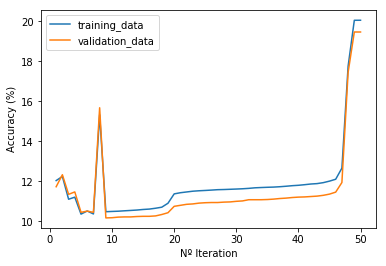

In [16]:
Tr_acc5, Val_acc5 = my_mnist_net5.train(training_data,
                                        validation_data, 
                                        True, True, True)
my_mnist_net5.save("mnist_nD30-10_it50_l10.model")

In [36]:
my_mnist_net.load('mnist_nD30-10_it20_l01.model')
my_mnist_net2.load("mnist_nD30-10_it50_l0001.model")
my_mnist_net4.load("mnist_nD30-10_it50_l1.model")
my_mnist_net5.load("mnist_nD30-10_it50_l10.model")

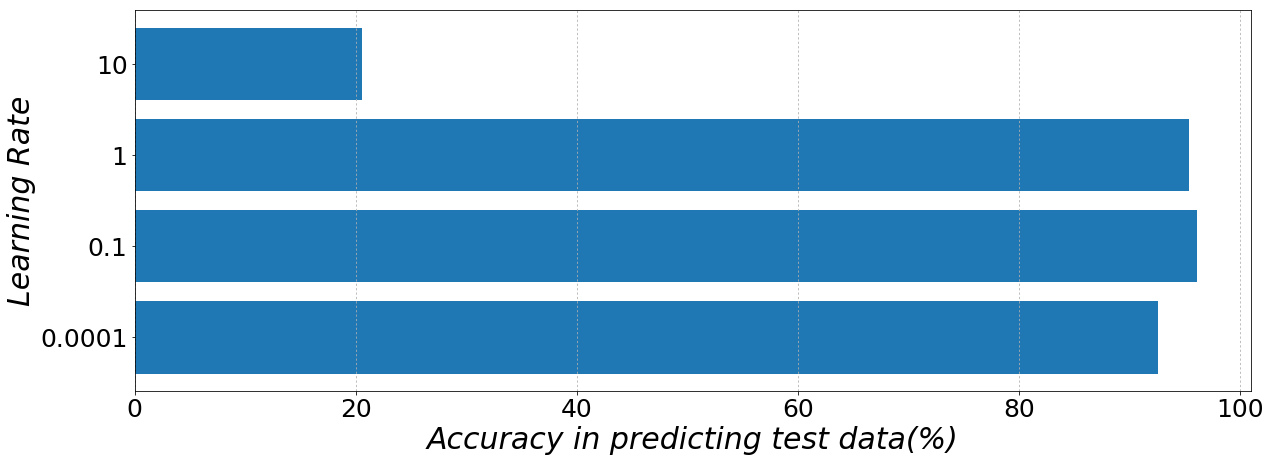

Accuracy of lr=0.0001 on test data:  92.56 %
Accuracy of lr=0.1 on test data:  96.12 %
Accuracy of lr=1 on test data:  95.38 %
Accuracy of lr=10 on test data:  20.59 %


In [92]:
learn_rates = [0.0001, 0.1, 1, 10]
x_range = [1,2,3,4]
accuracies = [0,0,0,0]
accuracies[0] = my_mnist_net2.predict(test_data)/len(test_data)*100
accuracies[1] = my_mnist_net.predict(test_data)/len(test_data)*100
accuracies[2] = my_mnist_net4.predict(test_data)/len(test_data)*100
accuracies[3] = my_mnist_net5.predict(test_data)/len(test_data)*100

plt.figure(figsize=[20,7])
plt.barh(x_range, accuracies)
plt.yticks(x_range, learn_rates, fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel('Learning Rate', fontsize=30, fontstyle='oblique')
plt.xlabel('Accuracy in predicting test data(%)',
           fontsize=30,
           fontstyle='oblique')
plt.grid(True, axis='x', ls=':')
plt.show()
print('Accuracy of lr=0.0001 on test data: ', accuracies[0], '%')
print('Accuracy of lr=0.1 on test data: ', accuracies[1], '%')
print('Accuracy of lr=1 on test data: ', accuracies[2], '%')
print('Accuracy of lr=10 on test data: ', accuracies[3], '%')


##### COMMENT: 
Overall, the best learning rate is 0.1. With 0.001 the learning curve steadily increases, but it's significantly when compared to 0.1. Also, clearly the learning rate of 10 is completely out of boundaries, not achieving almost any improvement at all. Comparing the accuracies in the prediction of test data, the best one is LEARNING RATE = 0.1

---
### <b> Question 2.2.2 </b>

initialize all weights to 0.  Plot the training accuracy curve.
Comment your results
    
        

In [ ]:
# NNet with weights to 0
my_mnist_net_all0 = nn.NNet(n_input=784,
                            netDims=[30,10],
                            n_iter=50,
                            learn=0.1)

iter:  1/50 --> E: 0.4111486307  -Training_Accuracy:  29.57  -t: 8.42 
iter:  2/50 --> E: 0.3716331103  -Training_Accuracy:  31.71  -t: 16.61 
iter:  3/50 --> E: 0.3700833178  -Training_Accuracy:  33.49  -t: 24.76 
iter:  4/50 --> E: 0.3693742264  -Training_Accuracy:  30.52  -t: 33.18 
iter:  5/50 --> E: 0.3688787600  -Training_Accuracy:  34.72  -t: 41.34 
iter:  6/50 --> E: 0.3687365868  -Training_Accuracy:  32.70  -t: 49.52 
iter:  7/50 --> E: 0.3685479100  -Training_Accuracy:  32.32  -t: 57.89 
iter:  8/50 --> E: 0.3683705919  -Training_Accuracy:  32.84  -t: 66.24 
iter:  9/50 --> E: 0.3682131519  -Training_Accuracy:  34.17  -t: 74.39 
iter: 10/50 --> E: 0.3681069767  -Training_Accuracy:  34.28  -t: 82.91 
iter: 11/50 --> E: 0.3679885920  -Training_Accuracy:  32.79  -t: 91.09 
iter: 12/50 --> E: 0.3678892802  -Training_Accuracy:  34.93  -t: 99.91 
iter: 13/50 --> E: 0.3678665387  -Training_Accuracy:  32.86  -t: 108.22 
iter: 14/50 --> E: 0.3677965832  -Training_Accuracy:  34.22  -t:

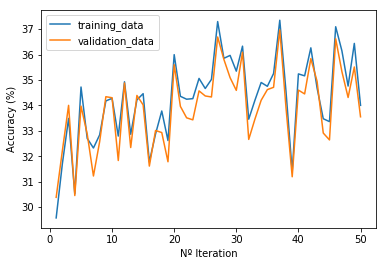

In [63]:
W0_zeros = np.zeros([785,30])
W1_zeros = np.zeros([31,10])
my_mnist_net_all0.init_w([W0_zeros, W1_zeros])
Tr_acc0, Val_acc0 = my_mnist_net_all0.train(training_data,
                                            validation_data, 
                                            True, True, True)
my_mnist_net_all0.save("mnistZeros_nD30-10_it50_l01.model")

##### Comment

Since al weights are symmetric, even when using the best learning rate (0.1), there is almost no improvement since there is no learning.

---
### <b> Question 2.2.3 </b>

Try with a different transfer function (such as tanh).

In [ ]:
#NNet with tanh as transfer function
my_mnist_net_tanh = nn.NNet(n_input=784,
                            netDims=[30,10],
                            n_iter=50,
                            learn=0.1,
                            tf=tf.tanh,
                            dtf=tf.dtanh)

iter:  1/50 --> E: 0.6551802134  -Training_Accuracy:  80.85  -t: 7.55 
iter:  2/50 --> E: 0.3187645623  -Training_Accuracy:  86.62  -t: 15.06 
iter:  3/50 --> E: 0.2254234698  -Training_Accuracy:  88.18  -t: 22.47 
iter:  4/50 --> E: 0.2008916854  -Training_Accuracy:  88.65  -t: 29.82 
iter:  5/50 --> E: 0.1886025766  -Training_Accuracy:  88.89  -t: 37.19 
iter:  6/50 --> E: 0.1798545705  -Training_Accuracy:  89.18  -t: 44.50 
iter:  7/50 --> E: 0.1751538077  -Training_Accuracy:  88.33  -t: 51.87 
iter:  8/50 --> E: 0.1717451991  -Training_Accuracy:  88.70  -t: 59.26 
iter:  9/50 --> E: 0.1651267158  -Training_Accuracy:  89.71  -t: 66.59 
iter: 10/50 --> E: 0.1631927344  -Training_Accuracy:  89.75  -t: 73.98 
iter: 11/50 --> E: 0.1603812964  -Training_Accuracy:  90.31  -t: 81.89 
iter: 12/50 --> E: 0.1578629626  -Training_Accuracy:  86.83  -t: 89.59 
iter: 13/50 --> E: 0.1561781881  -Training_Accuracy:  90.70  -t: 97.16 
iter: 14/50 --> E: 0.1585662188  -Training_Accuracy:  90.25  -t: 

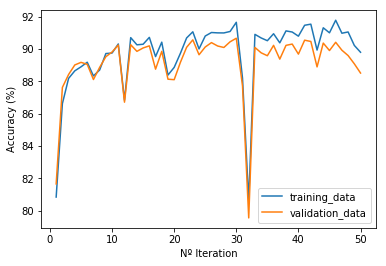

In [17]:
Tr_accTanh, Val_accTanh = my_mnist_net_tanh.train(training_data,
                                                  validation_data,
                                                  True, True, True)
my_mnist_net_tanh.save("mnistTanh_nD30-10_it50_l01.model")

In [78]:
#NNet with tanh as transfer function
my_mnist_net_tanh2 = nn.NNet(n_input=784,
                            netDims=[30,10],
                            n_iter=50,
                            learn=0.01,    # CHANGED LEARNING RATE
                            tf=tf.tanh,
                            dtf=tf.dtanh)

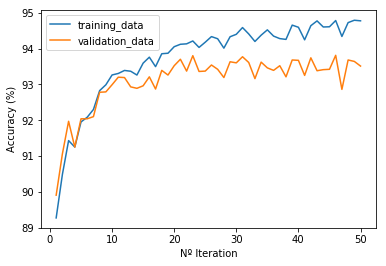

In [79]:
Tr_accTanh2, Val_accTanh2 = my_mnist_net_tanh2.train( training_data,
                                                      validation_data,
                                                      False, True, True)
my_mnist_net_tanh2.save("mnistTanh2_nD30-10_it50_l01.model")

In [84]:
print('Accuracy on test data for tanh, lr=0.01:  ' \
      , my_mnist_net_tanh2.predict(test_data)/len(test_data)*100, '%')

Accuracy on test data for tanh, lr=0.01:   93.15 %


##### Comments:

It seems that not only does it achieve a lower final accuracy (~90%), but it oscillates periodically. After analyzing the result, we concluded that a different learning rate is needed in order to properly train the NNet with tanh. We rerun it with 0.01, obtaining better results (limiting oscillations). 

despite our efforts, we can state that sigmoid function is better on this case (97% accuracy compared to the tanh's 93%)

---
### <b> Question 2.2.4 </b> 

Add more neurons in the hidden layer (try with 100, 200, 300). Plot the curve representing the validation accuracy versus the number of neurons in the hidden layer.

In [64]:
# 100 hidden neurons
my_mnist_net_100 = nn.NNet(n_input=784,
                           netDims=[100,10],
                           n_iter=50,
                           learn=0.1)

iter:  1/50 --> E: 0.1486648873  -Training_Accuracy:  93.83  -t: 46.37 
iter:  2/50 --> E: 0.0481223547  -Training_Accuracy:  95.63  -t: 94.01 
iter:  3/50 --> E: 0.0373463533  -Training_Accuracy:  96.54  -t: 150.01 
iter:  4/50 --> E: 0.0311599441  -Training_Accuracy:  97.18  -t: 202.76 
iter:  5/50 --> E: 0.0270190395  -Training_Accuracy:  97.49  -t: 256.61 
iter:  6/50 --> E: 0.0238932706  -Training_Accuracy:  97.79  -t: 310.90 
iter:  7/50 --> E: 0.0214591803  -Training_Accuracy:  98.10  -t: 365.59 
iter:  8/50 --> E: 0.0193909499  -Training_Accuracy:  98.32  -t: 416.36 
iter:  9/50 --> E: 0.0177294226  -Training_Accuracy:  98.39  -t: 458.78 
iter: 10/50 --> E: 0.0164367169  -Training_Accuracy:  98.63  -t: 498.48 
iter: 11/50 --> E: 0.0150771843  -Training_Accuracy:  98.69  -t: 536.39 
iter: 12/50 --> E: 0.0139723445  -Training_Accuracy:  98.79  -t: 573.80 
iter: 13/50 --> E: 0.0129469392  -Training_Accuracy:  98.83  -t: 611.77 
iter: 14/50 --> E: 0.0120800595  -Training_Accuracy: 

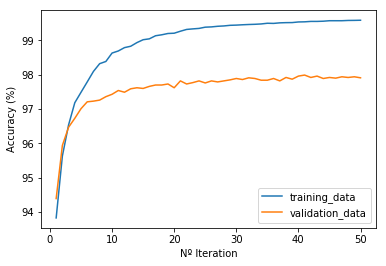

In [19]:
Tr_acc100, Val_acc100 = my_mnist_net_100.train(training_data,
                                               validation_data,
                                               True, True, True)
my_mnist_net_100.save("mnist_nD100-10_it50_l01.model")

In [65]:
# 200 hidden neurons
my_mnist_net_200 = nn.NNet(n_input=784,
                           netDims=[200,10],
                           n_iter=50,
                           learn=0.1)

iter:  1/50 --> E: 4.4999983929  -Training_Accuracy:  13.93  -t: 66.67 
iter:  2/50 --> E: 4.4999981394  -Training_Accuracy:  13.85  -t: 135.88 
iter:  3/50 --> E: 4.4999977801  -Training_Accuracy:  13.74  -t: 202.61 
iter:  4/50 --> E: 4.4999972208  -Training_Accuracy:  13.62  -t: 271.98 
iter:  5/50 --> E: 4.4999961881  -Training_Accuracy:  13.50  -t: 340.52 
iter:  6/50 --> E: 4.4999931642  -Training_Accuracy:  13.36  -t: 409.19 
iter:  7/50 --> E: 4.2696162814  -Training_Accuracy:  11.62  -t: 477.48 
iter:  8/50 --> E: 0.8136454887  -Training_Accuracy:  92.97  -t: 544.22 
iter:  9/50 --> E: 0.0509215721  -Training_Accuracy:  95.14  -t: 618.90 
iter: 10/50 --> E: 0.0380593811  -Training_Accuracy:  96.40  -t: 687.48 
iter: 11/50 --> E: 0.0311215563  -Training_Accuracy:  97.03  -t: 759.22 
iter: 12/50 --> E: 0.0262554340  -Training_Accuracy:  97.50  -t: 824.82 
iter: 13/50 --> E: 0.0227428447  -Training_Accuracy:  98.02  -t: 890.90 
iter: 14/50 --> E: 0.0200161531  -Training_Accuracy:

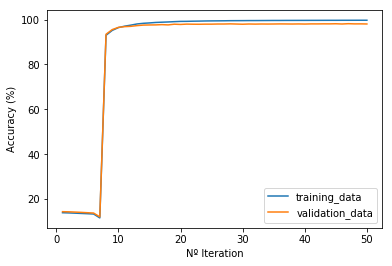

In [21]:
Tr_acc200, Val_acc200 = my_mnist_net_200.train(training_data,
                                               validation_data,
                                               True, True, True)
my_mnist_net_200.save("mnist_nD200-10_it50_l01.model")

In [85]:
# 300 hidden neurons
my_mnist_net_300 = nn.NNet(n_input=784,
                           netDims=[300,10],
                           n_iter=50,
                           learn=0.1)

iter:  1/50 --> E: 0.1049612095  -Training_Accuracy:  93.09  -t: 85.05 
iter:  2/50 --> E: 0.0529917190  -Training_Accuracy:  95.21  -t: 170.47 
iter:  3/50 --> E: 0.0388029736  -Training_Accuracy:  96.55  -t: 255.59 
iter:  4/50 --> E: 0.0309945032  -Training_Accuracy:  97.17  -t: 340.66 
iter:  5/50 --> E: 0.0257559440  -Training_Accuracy:  97.63  -t: 425.90 
iter:  6/50 --> E: 0.0221621472  -Training_Accuracy:  97.86  -t: 511.30 
iter:  7/50 --> E: 0.0191225638  -Training_Accuracy:  98.15  -t: 596.11 
iter:  8/50 --> E: 0.0167346066  -Training_Accuracy:  98.43  -t: 681.25 
iter:  9/50 --> E: 0.0148907601  -Training_Accuracy:  98.75  -t: 766.32 
iter: 10/50 --> E: 0.0132401383  -Training_Accuracy:  98.94  -t: 851.62 
iter: 11/50 --> E: 0.0117740454  -Training_Accuracy:  98.98  -t: 936.82 
iter: 12/50 --> E: 0.0105600532  -Training_Accuracy:  99.13  -t: 1022.27 
iter: 13/50 --> E: 0.0095468072  -Training_Accuracy:  99.20  -t: 1107.59 
iter: 14/50 --> E: 0.0087030590  -Training_Accurac

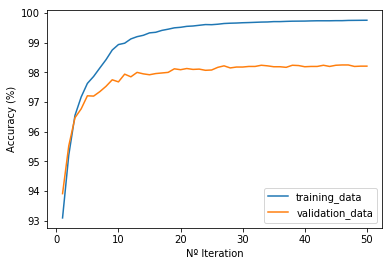

In [91]:
Tr_acc300, Val_acc300 = my_mnist_net_300.train(training_data,
                                               validation_data,
                                               True, True, True)
my_mnist_net_300.save('mnist_nD300-10_it50_l01.model')

In [68]:
my_mnist_net_100.load("mnist_nD100-10_it50_l01.model")
my_mnist_net_200.load("mnist_nD200-10_it50_l01.model")
my_mnist_net_300.load('mnist_nD300-10_it50_l01.model')

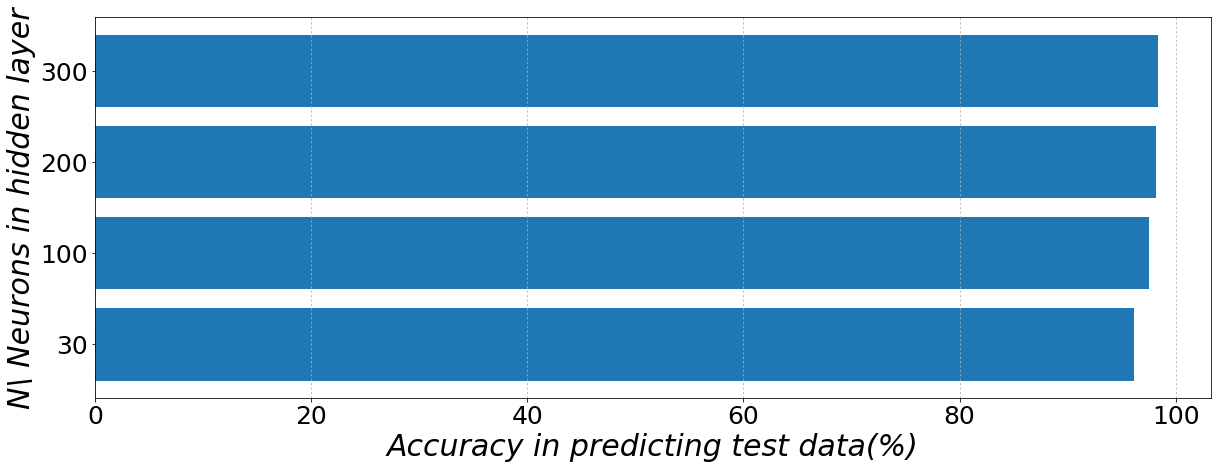

Accuracy of my_mnist_net on test data:  96.12 %
Accuracy of my_mnist_net_100 on test data:  97.57000000000001 %
Accuracy of my_mnist_net_200 on test data:  98.17 %
Accuracy of my_mnist_net_300 on test data:  98.33 %


In [93]:
learn_rates = [30, 100, 200, 300]
x_range = [1,2,3,4]
accuracies = [0,0,0,0]
accuracies[0] = my_mnist_net.predict(test_data)/len(test_data)*100
accuracies[1] = my_mnist_net_100.predict(test_data)/len(test_data)*100
accuracies[2] = my_mnist_net_200.predict(test_data)/len(test_data)*100
accuracies[3] = my_mnist_net_300.predict(test_data)/len(test_data)*100

plt.figure(figsize=[20,7])
plt.barh(x_range, accuracies)
plt.yticks(x_range, learn_rates, fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel('N\ Neurons in hidden layer',
           fontsize=30, fontstyle='oblique')
plt.xlabel('Accuracy in predicting test data(%)',
           fontsize=30,
           fontstyle='oblique')
plt.grid(True, axis='x', ls=':')
plt.show()
print('Accuracy of my_mnist_net on test data: ', accuracies[0], '%')
print('Accuracy of my_mnist_net_100 on test data: ', accuracies[1], '%')
print('Accuracy of my_mnist_net_200 on test data: ', accuracies[2], '%')
print('Accuracy of my_mnist_net_300 on test data: ', accuracies[3], '%')

##### COMMENT

As we can clearly see, adding more neurons in the hidden layer does increase the the accuracy of the NNet. Thus, using 300 neurons would be the best choice if highest accuracy is the objective. Nevertheless, the time that it takes to train also increases substantially.


---
### <b> Question 2.2.5 </b>

Add one additionnal hidden layers and train your network, discuss your results with different setting. 



In [ ]:
my_final_net = nn.NNet(n_input=784,
                       netDims=[40, 30, 20, 10],
                       n_iter=50,
                       learn=0.1)

iter:  1/50 --> E: 0.4542410481  -Training_Accuracy:  11.36  -t: 13.97 
iter:  2/50 --> E: 0.4505962036  -Training_Accuracy:  11.36  -t: 28.07 
iter:  3/50 --> E: 0.4269295590  -Training_Accuracy:  30.80  -t: 42.06 
iter:  4/50 --> E: 0.3508702696  -Training_Accuracy:  41.26  -t: 56.02 
iter:  5/50 --> E: 0.2507930599  -Training_Accuracy:  82.82  -t: 70.01 
iter:  6/50 --> E: 0.0938990633  -Training_Accuracy:  91.50  -t: 83.85 
iter:  7/50 --> E: 0.0589105144  -Training_Accuracy:  94.20  -t: 97.76 
iter:  8/50 --> E: 0.0470973265  -Training_Accuracy:  94.75  -t: 111.74 
iter:  9/50 --> E: 0.0404974185  -Training_Accuracy:  95.54  -t: 126.12 
iter: 10/50 --> E: 0.0359570604  -Training_Accuracy:  96.01  -t: 141.37 
iter: 11/50 --> E: 0.0324975302  -Training_Accuracy:  96.43  -t: 156.33 
iter: 12/50 --> E: 0.0303520843  -Training_Accuracy:  96.79  -t: 170.84 
iter: 13/50 --> E: 0.0282469211  -Training_Accuracy:  97.02  -t: 185.27 
iter: 14/50 --> E: 0.0262667683  -Training_Accuracy:  97.3

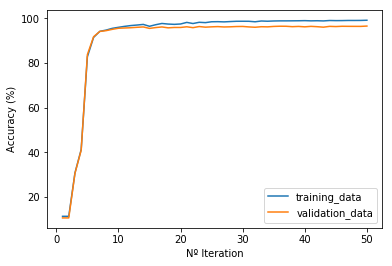

In [3]:
Tr_accFin, Val_accFin = my_final_net.train(training_data,
                                           validation_data,
                                           True, True, True)
my_final_net.save("mnist_nD40-30-20-10_it50_l005.model")

In [70]:
my_final_net = nn.NNet(n_input=784,
                       netDims=[50, 50, 10],
                       n_iter=50,
                       learn=0.1)

iter:  1/50 --> E: 0.1931058091  -Training_Accuracy:  92.52  -t: 13.41 
iter:  2/50 --> E: 0.0510291682  -Training_Accuracy:  95.21  -t: 27.03 
iter:  3/50 --> E: 0.0382512938  -Training_Accuracy:  96.21  -t: 40.53 
iter:  4/50 --> E: 0.0314694751  -Training_Accuracy:  96.64  -t: 54.08 
iter:  5/50 --> E: 0.0269607170  -Training_Accuracy:  97.20  -t: 67.76 
iter:  6/50 --> E: 0.0237940038  -Training_Accuracy:  97.81  -t: 81.11 
iter:  7/50 --> E: 0.0211354928  -Training_Accuracy:  97.93  -t: 94.50 
iter:  8/50 --> E: 0.0188876801  -Training_Accuracy:  98.21  -t: 108.14 
iter:  9/50 --> E: 0.0173905502  -Training_Accuracy:  98.20  -t: 121.57 
iter: 10/50 --> E: 0.0163844649  -Training_Accuracy:  98.47  -t: 134.97 
iter: 11/50 --> E: 0.0148305431  -Training_Accuracy:  98.52  -t: 148.54 
iter: 12/50 --> E: 0.0138089674  -Training_Accuracy:  98.70  -t: 162.00 
iter: 13/50 --> E: 0.0126515454  -Training_Accuracy:  98.60  -t: 175.45 
iter: 14/50 --> E: 0.0119518641  -Training_Accuracy:  98.8

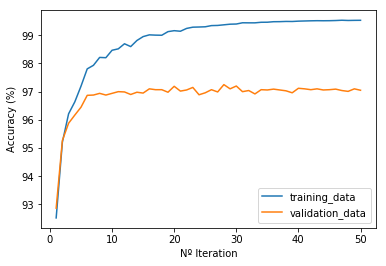

In [4]:
Tr_accFin, Val_accFin = my_final_net.train(training_data,
                                           validation_data,
                                           True,True, True)
my_final_net.save("mnist_nD50-50-10_it50_l005.model")

In [94]:
print('Accuracy of my_final_net on test data: ', my_final_net.predict(test_data)/len(test_data)*100, '%')

Accuracy of my_final_net on test data:  97.09 %


##### COMMENT

Although there is an increase in accuracy when compared to the shallow architectures, the final accuracy with an extra layer (97%) is still a step below using 300 neurons in the hidden layer (98.33%). Nevertheless, the decrease in training time is a parameter to be considered.

## Storing and Shipping Results

In [55]:
# Save all the accuracies
Tr_accuracy ={'learn0.1':Tr_acc1,
              'learn0.001':Tr_acc2,
              'learn1':Tr_acc4,
              'learn10':Tr_acc5,
              'Weq0':Tr_acc0,
              'tfTanh':Tr_accTanh,
              'nHid100':Tr_acc100,
              'nHid200':Tr_acc200,
              'nHid300':Tr_acc300}
Val_accuracy ={'learn0.1':Val_acc1,
              'learn0.001':Val_acc2,
              'learn1':Val_acc4,
              'learn10':Val_acc5,
              'Weq0':Val_acc0,
              'tfTanh':Val_accTanh,
              'nHid100':Val_acc100,
              'nHid200':Val_acc200,
              'nHid300':Val_acc300}
with open("Accuracies.vectors", 'wb') as f:
    pickle.dump({'Tr_accuracy':Tr_accuracy,
                 'Val_accuracy':Val_accuracy}, f )

In [ ]:
# Reload accuracies
with open("Accuracies.vectors", 'rb') as f:
    data = pickle.load(f)
Tr_accuracy = data['Tr_accuracy']
Val_accuracy = data['Val_accuracy']